# Import Libraries

In [60]:
import cv2
from craft_text_detector import Craft
import matplotlib.pyplot as plt
import os
import pytesseract
from pytesseract import Output
import numpy as np

# Read File

In [33]:
image = cv2.imread('test/1.png')

# Tesseract

In [34]:
pytesseract.pytesseract.tesseract_cmd = r'C://Program Files//Tesseract-OCR//tesseract.exe'

os.environ["TESSDATA_PREFIX"] =  "C://Program Files//Tesseract-OCR//tessdata"
custom_config = r'-c preserve_interword_spaces=1'

# Plot Image

In [35]:
def plot_image(img):
    plt.axis('off');
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));
    plt.show();

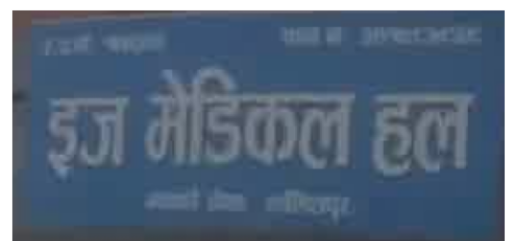

In [36]:
plot_image(image)

# Initialize Class

In [86]:
craft = Craft( crop_type="box", cuda=True,text_threshold=0.8,link_threshold=0.4,low_text=0.25)

c:\Users\Ghost\anaconda3\envs\galli_maps\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Ghost\anaconda3\envs\galli_maps\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# Predict

In [87]:
prediction_result = craft.detect_text(image)

# Get Bounding Boxes

In [88]:
boxes = prediction_result['boxes']

In [102]:
class CraftModule:
    def __init__(self,craft):
        self.craft = craft
        self.boxes = None
        self.image = None
    
    def plot_image(self,img):
        plt.axis('off');
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));
        plt.show();
    
    def detect_text(self,image):
        self.image = image.copy()
        self.boxes = self.craft.detect_text(self.image)['boxes']
        plot_image(self.image)
        print('------------ Detected Text Regions ------------')
        self.show_cropped_image()

    def get_bounding_boxes(self,box):
        flat_box = box.flatten()
        x_min = round(min([flat_box[x] for x in [0,2,4,6]]))
        y_min = round(min([flat_box[y] for y in [1,3,5,7]]))
        x_max = round(max([flat_box[x] for x in [0,2,4,6]]))
        y_max = round(max([flat_box[y] for y in [1,3,5,7]]))

        return x_min,y_min,x_max,y_max
    
    def show_cropped_image(self):
        for box in self.boxes:
            x_min,y_min,x_max,y_max = self.get_bounding_boxes(box)
            roi = image[y_min : y_max , x_min : x_max].copy()
            roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            roi_invert = cv2.bitwise_not(roi_gray)
            plot_image(cv2.bitwise_not(roi_gray))
            text = pytesseract.image_to_string(roi_invert,lang = 'hin', config = custom_config)
            print(text)
            plot_image(roi)
    

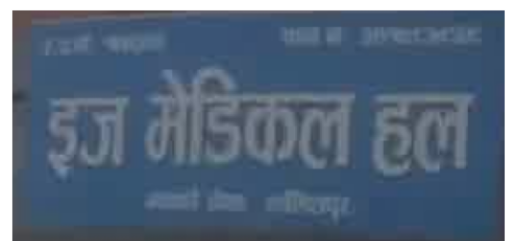

------------ Detected Text Regions ------------


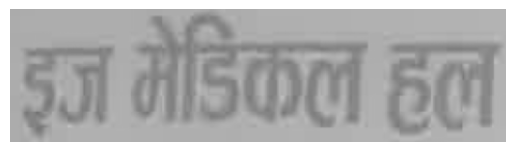

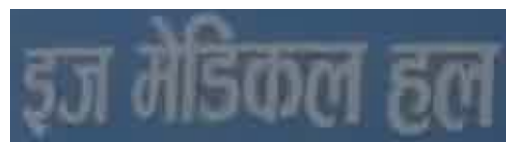

In [105]:
craft = Craft( crop_type="box", cuda=True,text_threshold=0.8,link_threshold=0.3,low_text=0.25)
CraftModule(craft).detect_text(image)